<div class='alert-block alert-info'>
    <br>
    <h1 align="center"><b>Final Project:</b> SkillCraft1</h1>
    <h3 align="center">Python for Data Analysis</h3>
    <br>
</div>

##### Our goal is to predict the best caracteristics to have the best rank at StarCraft  game

<div class='alert-block alert-info'>
    <br>
    <h6 style="font-style: normal;"><b>Import libraries</b></h6>
    <br>
</div>

In [306]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import norm, skew
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

<div class='alert-block alert-info'>
    <br>
    <h6 style="font-style: normal;"><b>Loading the data</b></h6>
    <br>
</div>

In [307]:
df = pd.read_csv('SkillCraft1_Dataset.csv')

<div class='alert-block alert-info'>
    <br>
    <h2 style="font-style: normal;"><b>Quality of the dataset</b></h2>
    <h6 style="font-style: normal;"><b>Inspecting the data</b></h6>
    <br>
</div>

In [308]:
df.head()
#display first few rows

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
0,52,5,27,10,3000,143.7180,0.003515,0.000220,7,0.000110,0.000392,0.004849,32.6677,40.8673,4.7508,28,0.001397,6,0.0,0.000000
1,55,5,23,10,5000,129.2322,0.003304,0.000259,4,0.000294,0.000432,0.004307,32.9194,42.3454,4.8434,22,0.001193,5,0.0,0.000208
2,56,4,30,10,200,69.9612,0.001101,0.000336,4,0.000294,0.000461,0.002926,44.6475,75.3548,4.0430,22,0.000745,6,0.0,0.000189
3,57,3,19,20,400,107.6016,0.001034,0.000213,1,0.000053,0.000543,0.003783,29.2203,53.7352,4.9155,19,0.000426,7,0.0,0.000384
4,58,3,32,10,500,122.8908,0.001136,0.000327,2,0.000000,0.001329,0.002368,22.6885,62.0813,9.3740,15,0.001174,4,0.0,0.000019


In [309]:
df.describe()
#summary statistics 

,GameID,LeagueIndex,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
count,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000
mean,4805.012371,4.184094,117.046947,0.004299,0.000374,4.364654,0.000098,0.000387,0.003463,40.361562,63.739403,5.272988,22.131664,0.001032,6.534021,0.000059,0.000142
std,2719.944851,1.517327,51.945291,0.005284,0.000225,2.360333,0.000166,0.000377,0.000992,17.153570,19.238869,1.494835,7.431719,0.000519,1.857697,0.000111,0.000265
min,52.000000,1.000000,22.059600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000679,6.666700,24.093600,2.038900,5.000000,0.000077,2.000000,0.000000,0.000000
25%,2464.500000,3.000000,79.900200,0.001258,0.000204,3.000000,0.000000,0.000140,0.002754,28.957750,50.446600,4.272850,17.000000,0.000683,5.000000,0.000000,0.000000
50%,4874.000000,4.000000,108.010200,0.002500,0.000353,4.000000,0.000040,0.000281,0.003395,36.723500,60.931800,5.095500,22.000000,0.000905,6.000000,0.000000,0.000020
75%,7108.500000,5.000000,142.790400,0.005133,0.000499,6.000000,0.000119,0.000514,0.004027,48.290500,73.681300,6.033600,27.000000,0.001259,8.000000,0.000086,0.000181
max,10095.000000,8.000000,389.831400,0.043088,0.001752,10.000000,0.003019,0.004041,0.007971,237.142900,176.372100,18.558100,58.000000,0.005149,13.000000,0.000902,0.003084


In [310]:
df.dtypes
#Check data types

GameID                    int64
LeagueIndex               int64
Age                      object
HoursPerWeek             object
TotalHours               object
APM                     float64
SelectByHotkeys         float64
AssignToHotkeys         float64
UniqueHotkeys             int64
MinimapAttacks          float64
MinimapRightClicks      float64
NumberOfPACs            float64
GapBetweenPACs          float64
ActionLatency           float64
ActionsInPAC            float64
TotalMapExplored          int64
WorkersMade             float64
UniqueUnitsMade           int64
ComplexUnitsMade        float64
ComplexAbilitiesUsed    float64
dtype: object

<div class='alert-block alert-info'>
    <br>
    <h6 style="font-style: normal;"><b>Data preprocessing</b></h6>
    <br>
</div>

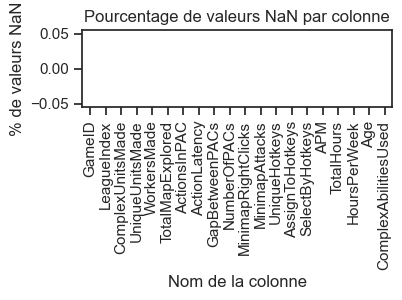

In [311]:
nan_percentages = df.isnull().sum() / len(df) * 100
nan_percentages = nan_percentages.sort_values(ascending=False)
# Créer un histogramme
plt.figure(figsize=(4, 1))
nan_percentages.plot(kind='bar')
plt.xlabel('Nom de la colonne')
plt.ylabel('% de valeurs NaN')
plt.title('Pourcentage de valeurs NaN par colonne')
plt.xticks(rotation=90)
plt.show()

There are no Nan values in the dataset so no need to use df.dropna()

In [312]:
#Convert categorical data into a numerical format
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['HoursPerWeek'] = pd.to_numeric(df['HoursPerWeek'], errors='coerce')
df['TotalHours'] = pd.to_numeric(df['TotalHours'], errors='coerce')
    
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['HoursPerWeek'].fillna(df['HoursPerWeek'].mean(), inplace=True)
df['TotalHours'].fillna(df['TotalHours'].mean(), inplace=True)
print("Type des colonnes : ", df.dtypes)

Type des colonnes :  GameID                    int64
LeagueIndex               int64
Age                     float64
HoursPerWeek            float64
TotalHours              float64
APM                     float64
SelectByHotkeys         float64
AssignToHotkeys         float64
UniqueHotkeys             int64
MinimapAttacks          float64
MinimapRightClicks      float64
NumberOfPACs            float64
GapBetweenPACs          float64
ActionLatency           float64
ActionsInPAC            float64
TotalMapExplored          int64
WorkersMade             float64
UniqueUnitsMade           int64
ComplexUnitsMade        float64
ComplexAbilitiesUsed    float64
dtype: object


In [313]:
#Dropping the columns we are nnot going to use 
df.drop(['GameID'], axis=1, inplace=True)
print(df.columns)

Index(['LeagueIndex', 'Age', 'HoursPerWeek', 'TotalHours', 'APM',
       'SelectByHotkeys', 'AssignToHotkeys', 'UniqueHotkeys', 'MinimapAttacks',
       'MinimapRightClicks', 'NumberOfPACs', 'GapBetweenPACs', 'ActionLatency',
       'ActionsInPAC', 'TotalMapExplored', 'WorkersMade', 'UniqueUnitsMade',
       'ComplexUnitsMade', 'ComplexAbilitiesUsed'],
      dtype='object')


We dropped GameID column because we want to predict the best characteristics to be in the best LeagueIndex and there are clearly no link between de GameID and the LeagueIndex. We will then use a heatmap to drop other columns

In [314]:
#We can now normalize the dataset as all columns are numerical
scaler = MinMaxScaler()
df[df.columns] = scaler.fit_transform(df[df.columns])

In [315]:
df.head()

,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
0,0.571429,0.392857,0.059524,0.002997,0.330799,0.081580,0.125384,0.7,0.036382,0.097089,0.571893,0.112814,0.110151,0.164167,0.433962,0.260161,0.363636,0.0,0.000000
1,0.571429,0.250000,0.059524,0.004997,0.291411,0.076675,0.148079,0.4,0.097391,0.107017,0.497565,0.113906,0.119858,0.169772,0.320755,0.220120,0.272727,0.0,0.067312
2,0.428571,0.500000,0.059524,0.000197,0.130248,0.025554,0.191515,0.4,0.097248,0.114188,0.308128,0.164793,0.336628,0.121319,0.320755,0.131610,0.363636,0.0,0.061212
3,0.285714,0.107143,0.119048,0.000397,0.232595,0.023987,0.121620,0.1,0.017645,0.134480,0.425632,0.097857,0.194654,0.174137,0.264151,0.068848,0.454545,0.0,0.124390
4,0.285714,0.571429,0.059524,0.000497,0.274168,0.026365,0.186810,0.2,0.000000,0.328786,0.231676,0.069516,0.249462,0.444035,0.188679,0.216374,0.181818,0.0,0.006244


<div class='alert-block alert-info'>
    <br>
    <h2 style="font-style: normal;"><b>Data exploration</b></h2>
    <h3 style="font-style: normal;"><b>Distribution</b></h3>
    <br>
</div>

We will now look the distribution to have a visual and quantitative understanding of the data. It helps in identifying patterns, trends, and anomalies, which are essential for making informed decisions and drawing accurate conclusions.


 mu = 0.45 and sigma = 0.22



C:\Users\jadoo\AppData\Local\Temp\ipykernel_23692\510791992.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['LeagueIndex'] , fit=norm);


Text(0.5, 1.0, 'Ranking distribution')

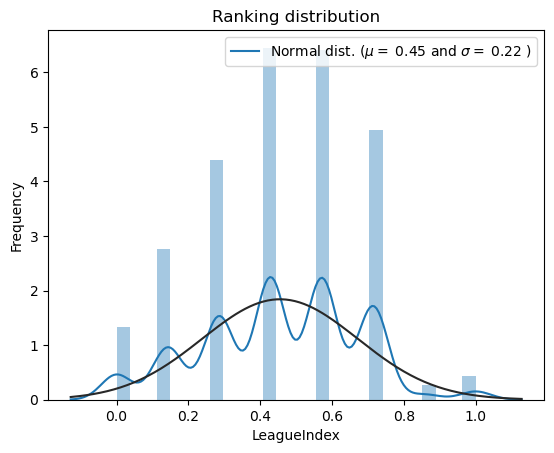

In [105]:
sns.distplot(df['LeagueIndex'] , fit=norm);

(mu, sigma) = norm.fit(df['LeagueIndex'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Ranking distribution')

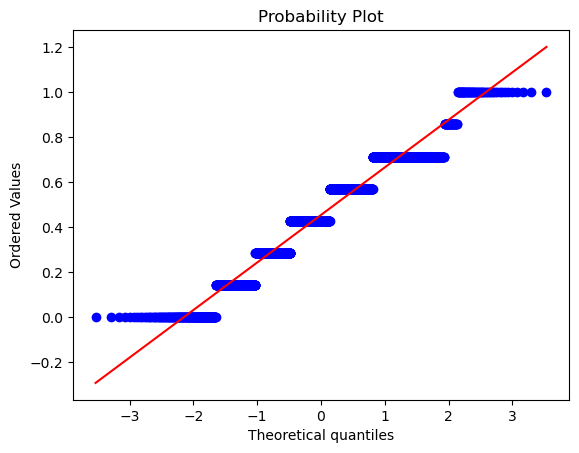

In [106]:
fig = plt.figure()
res = stats.probplot(df['LeagueIndex'], plot=plt)
plt.show()

These two graphics show that the data does not seem to follow a perfect normal distribution, as evidenced by the divergence of the plotted points from the red line, and a concentration of values highest between 0.4 and 0.6. This may suggest the presence of outliers, which is why we will try to drop these outliers with the descriptive statistics and to drop no reliable data with some vizualisations.

<div class='alert-block alert-info'>
    <br>
    <h3 style="font-style: normal;"><b>Descriptive statistics</b></h3>
    <br>
</div>

We will first try to understand our dataset with basic vizualisation for several important columns

We show every graphic to see the outliers 

<div class='alert-block alert-info'>
    <br>
    <h6 style="font-style: normal;"><b>Total Hours</b></h6>
    <br>
</div>

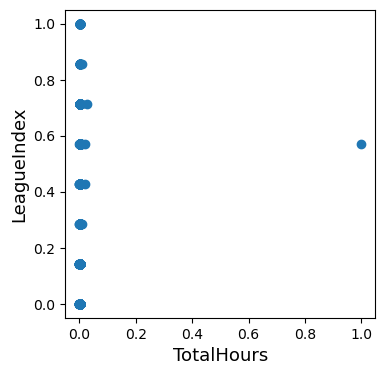

In [47]:
fig, ax = plt.subplots(figsize=(4, 4))
ax.scatter(x = df['TotalHours'], y = df['LeagueIndex'])
plt.ylabel('LeagueIndex', fontsize=13)
plt.xlabel('TotalHours', fontsize=13)
#plt.xlim([0, 100000])
plt.show()

The dot at the end shows that someone played for 1,000,000 hours and this is messing up our graph. So we will set the limits to not plot it for now

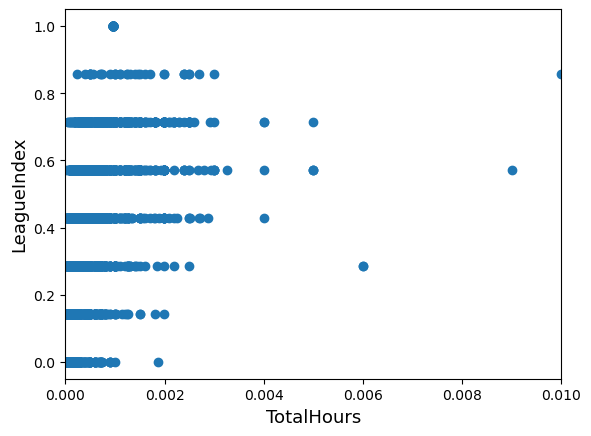

In [53]:
fig, ax = plt.subplots()
ax.scatter(x = df['TotalHours'], y = df['LeagueIndex'])
plt.ylabel('LeagueIndex', fontsize=13)
plt.xlabel('TotalHours', fontsize=13)
plt.xlim([0, 0.01])
plt.show()

After reflexion, we conclude that TotalHours is not a reliable data column because some people create new account after they trained a lot and this is messing our dataset and not helping for our prediction.

In [104]:
df.drop(['TotalHours'], axis=1, inplace=True)
print(df.columns)

Index(['LeagueIndex', 'Age', 'HoursPerWeek', 'APM', 'SelectByHotkeys',
       'AssignToHotkeys', 'UniqueHotkeys', 'MinimapAttacks',
       'MinimapRightClicks', 'NumberOfPACs', 'GapBetweenPACs', 'ActionLatency',
       'ActionsInPAC', 'TotalMapExplored', 'WorkersMade', 'UniqueUnitsMade',
       'ComplexUnitsMade', 'ComplexAbilitiesUsed'],
      dtype='object')


<div class='alert-block alert-info'>
    <br>
    <h6 style="font-style: normal;"><b>APM</b></h6>
    <br>
</div>

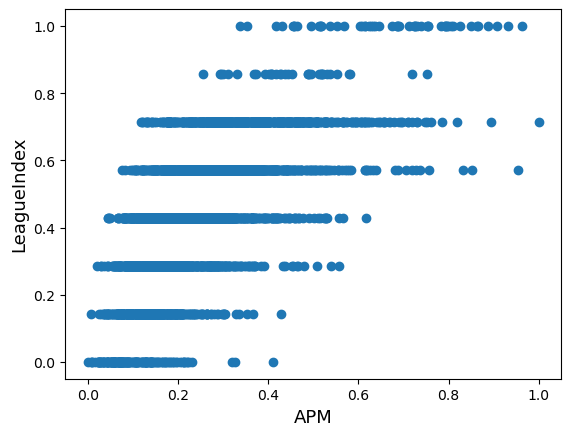

In [56]:
fig, ax = plt.subplots()
ax.scatter(x = df['APM'], y = df['LeagueIndex'])
plt.ylabel('LeagueIndex', fontsize=13)
plt.xlabel('APM', fontsize=13)
plt.show()

We can understand that there are no need to do a lot of actions/min to be at a good rank

<div class='alert-block alert-info'>
    <br>
    <h6 style="font-style: normal;"><b>NumberOfPACs</b></h6>
    <br>
</div>

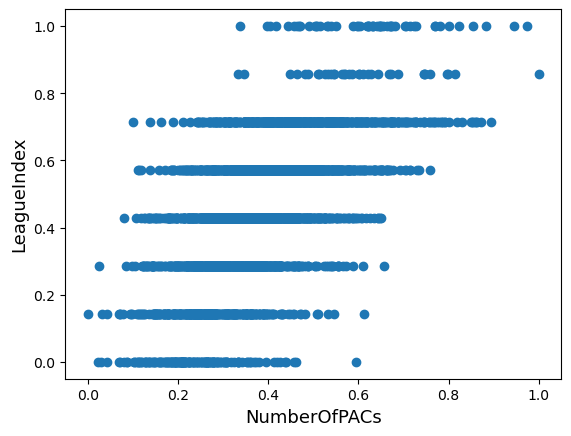

In [58]:
fig, ax = plt.subplots()
ax.scatter(x = df['NumberOfPACs'], y = df['LeagueIndex'])
plt.ylabel('LeagueIndex', fontsize=13)
plt.xlabel('NumberOfPACs', fontsize=13)
plt.show()

PAC : Percepion Action Cycle = it is the number of action after realizing an information. So it is obvious that the best players have a big number of PACs

<div class='alert-block alert-info'>
    <br>
    <h6 style="font-style: normal;"><b>GapBetweenPACs</b></h6>
    <br>
</div>

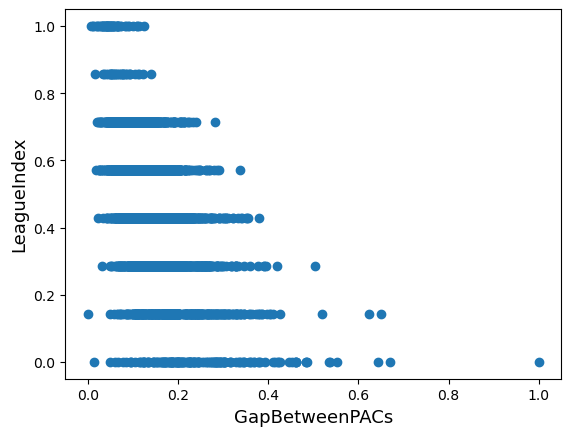

In [59]:
fig, ax = plt.subplots()
ax.scatter(x = df['GapBetweenPACs'], y = df['LeagueIndex'])
plt.ylabel('LeagueIndex', fontsize=13)
plt.xlabel('GapBetweenPACs', fontsize=13)
plt.show()

PACs seem to be a very good predictor

<div class='alert-block alert-info'>
    <br>
    <h6 style="font-style: normal;"><b>SelectByHotkeys</b></h6>
    <br>
</div>

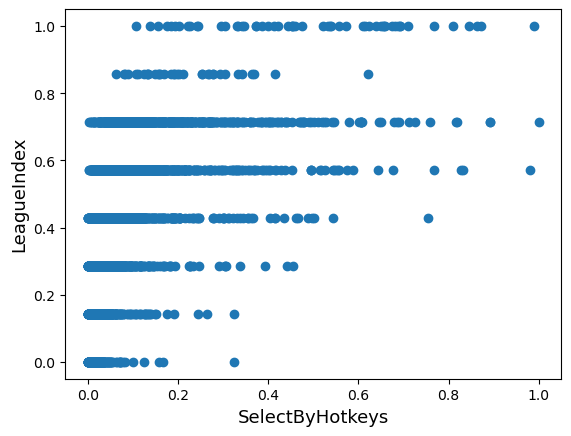

In [60]:
fig, ax = plt.subplots()
ax.scatter(x = df['SelectByHotkeys'], y = df['LeagueIndex'])
plt.ylabel('LeagueIndex', fontsize=13)
plt.xlabel('SelectByHotkeys', fontsize=13)
plt.show()

There are Diamond and Master players who dont use hotkeys which is impressive

<div class='alert-block alert-info'>
    <br>
    <h6 style="font-style: normal;"><b>Age</b></h6>
    <br>
</div>

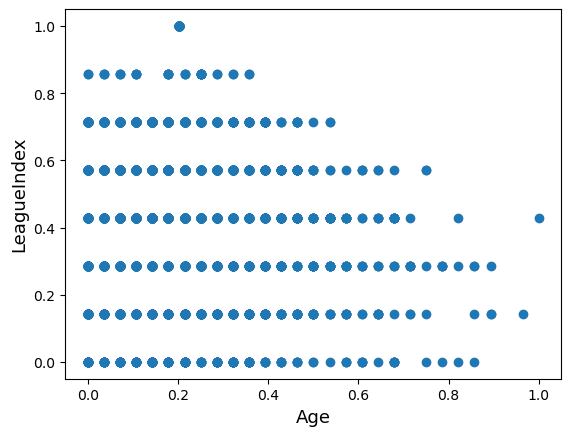

In [62]:
fig, ax = plt.subplots()
ax.scatter(x = df['Age'], y = df['LeagueIndex'])
plt.ylabel('LeagueIndex', fontsize=13)
plt.xlabel('Age', fontsize=13)
plt.show()

It is not a suprise that the best players are also the youngest because they maybe have more time to play and train

<div class='alert-block alert-info'>
    <br>
    <h3 style="font-style: normal;"><b>Visualizations</b></h3>
    <br>
</div>

We will now try to understand the link between every columns and every data to better understand the dataset

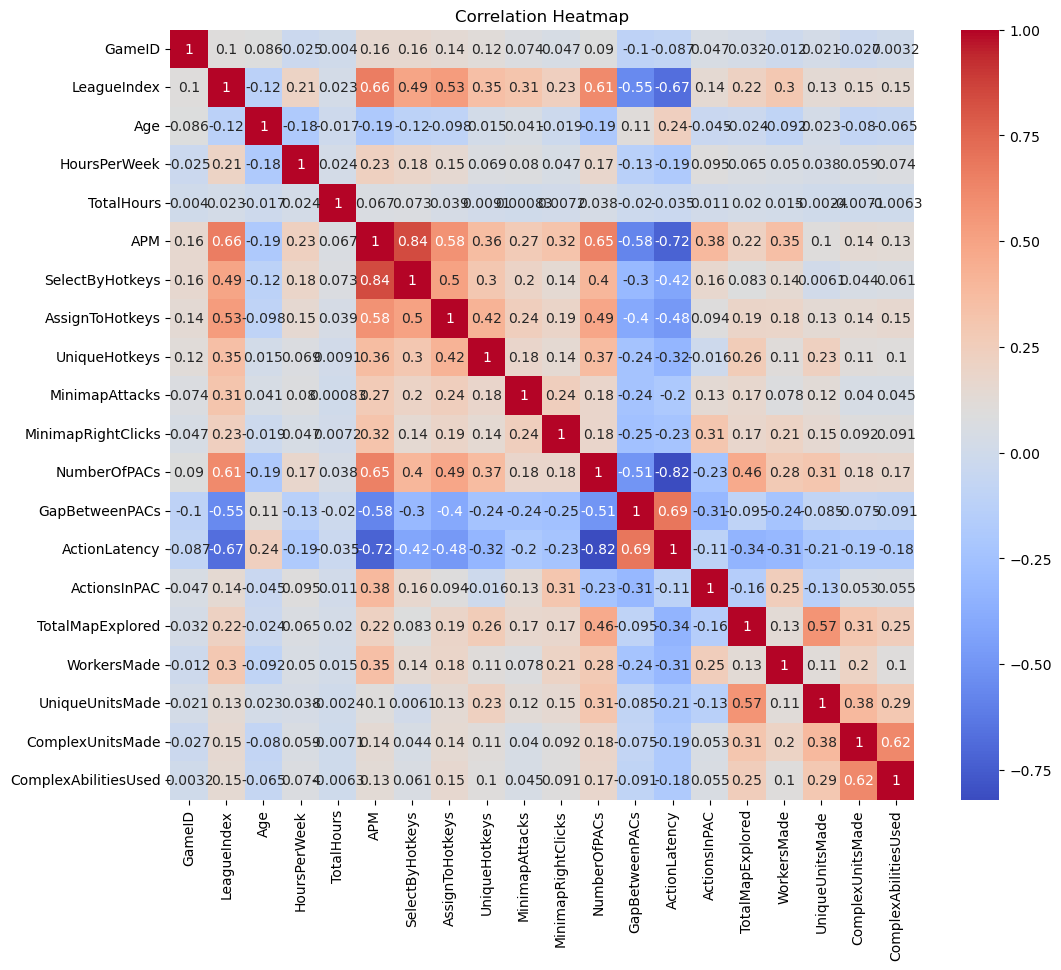

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Thanks to the heatmap we can drop the features that are the less related to the LeagueIndex. We can confirm that GameID was not related because it has a coefficient of 0,1. We can also drop ComplexAbilitiesUsed, ComplexUnitsMade, UniqueUnitsMade and ActionsInPAC.

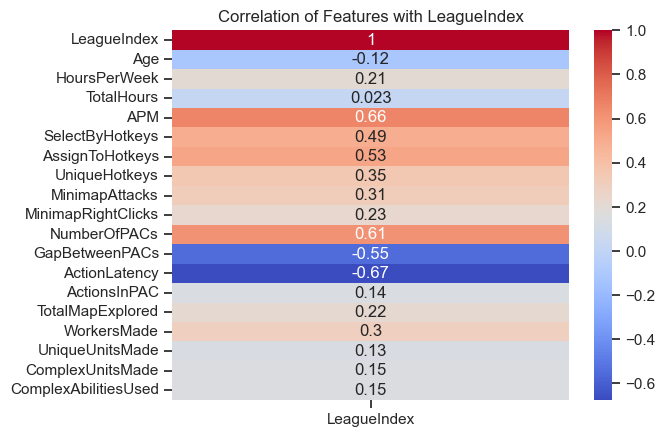

In [317]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix[['LeagueIndex']], annot=True, cmap='coolwarm')
plt.title('Correlation of Features with LeagueIndex')
plt.show()


Here we have a better visualization of the impact of each features on the LeagueIndex

In [247]:
df.drop(['ComplexAbilitiesUsed', 'ComplexUnitsMade', 'UniqueUnitsMade', 'ActionsInPAC'], axis=1, inplace=True)
print(df.columns)

Index(['LeagueIndex', 'Age', 'HoursPerWeek', 'APM', 'SelectByHotkeys',
       'AssignToHotkeys', 'UniqueHotkeys', 'MinimapAttacks',
       'MinimapRightClicks', 'NumberOfPACs', 'GapBetweenPACs', 'ActionLatency',
       'TotalMapExplored', 'WorkersMade'],
      dtype='object')


Now, we will create some visualizations with the features that are the most related to the LeagueIndex.

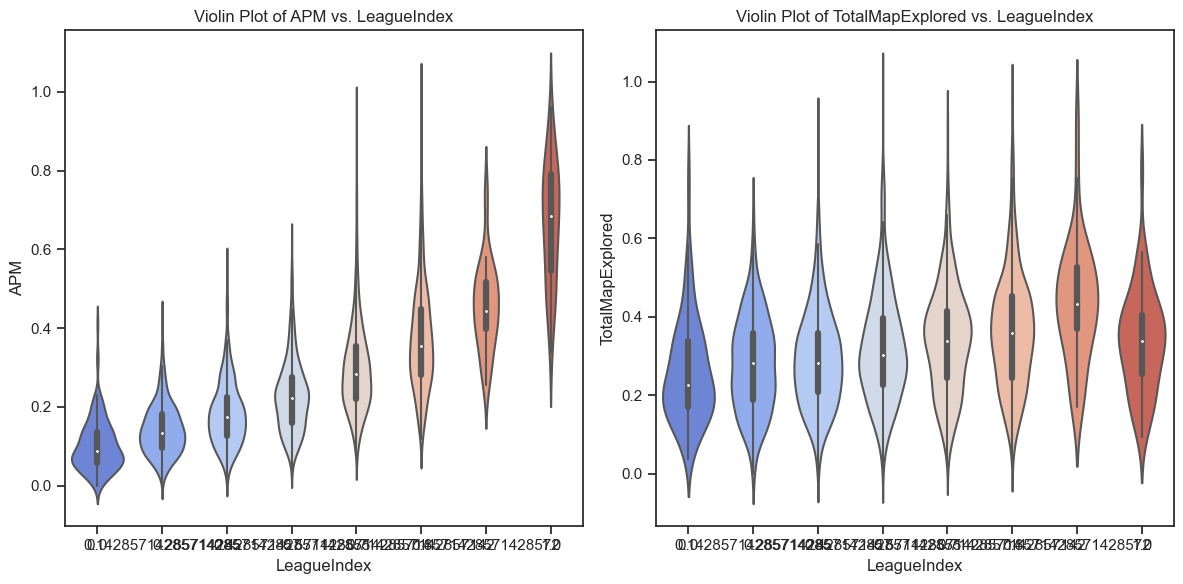

In [318]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.violinplot(x='LeagueIndex', y='APM', data=df, palette="coolwarm")
plt.title('Violin Plot of APM vs. LeagueIndex')

plt.subplot(1, 2, 2)
sns.violinplot(x='LeagueIndex', y='TotalMapExplored', data=df, palette="coolwarm")
plt.title('Violin Plot of TotalMapExplored vs. LeagueIndex')


plt.tight_layout()
plt.show()


The width of each 'violin' represents the density of data points at different values. We can observe that a small density of people do way more action/min in the best league compared to the worst league wherease a lot of people explore the whole map exactly as much as in the first league and with a median that is quite close. We can conclude that APM has more effect on the LeagueIndex than TotalMapExplored has. 

C:\Users\jadoo\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



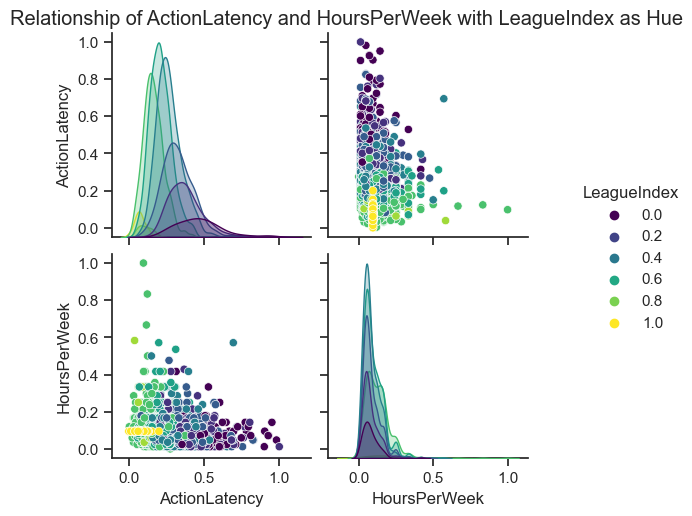

In [319]:
selected_features = ['ActionLatency', 'HoursPerWeek', 'LeagueIndex']
sns.pairplot(df[selected_features], hue='LeagueIndex', palette='viridis')
plt.suptitle('Relationship of ActionLatency and HoursPerWeek with LeagueIndex as Hue', y=1.02) 
plt.show()


It appears in the scatter plots that as ActionLatency decreases, the concentration of points with higher LeagueIndex increases, suggesting that lower action latency is associated with higher league index.

The density plots on the diagonal give us an insight into the distribution of each feature for different LeagueIndex values. The ActionLatency plot shows distinct peaks, especially for higher LeagueIndex values, suggesting a stronger relationship. In contrast, the HoursPerWeek density plots are more overlapped, indicating a weaker relationship with LeagueIndex.

<div class='alert-block alert-info'>
    <br>
    <h2 style="font-style: normal;"><b>Splitting the data</b></h2>
    <br>
</div>

In [112]:
#The target variable is 'LeagueIndex'
X = df.drop('LeagueIndex', axis=1)
y = df['LeagueIndex']

In [113]:
#X will contain all the features, and y will contain the target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

<div class='alert-block alert-info'>
    <br>
    <h2 style="font-style: normal;"><b>Modelling</b></h2>
    <br>
</div>

We first thought that to predict a rank it was better to use classification algorithms. But our dataset is numerical and our target variable 'LeagueIndex' is continuous and could potentiall take an infinite possibility of numbers between 0 and 1 (because of the normalization) so it is better to use regression algorithms.

<div class='alert-block alert-info'>
    <br>
    <h6 style="font-style: normal;"><b>Linear regression</b></h6>
    <br>
</div>

In [228]:
# Define a pipeline combining a standard scaler and a linear regressor
pipeline = make_pipeline(StandardScaler(), LinearRegression())

Since LinearRegression doesn't have hyperparameters to tune, we don't need a grid search

In [229]:
# Simply fit the pipeline to the training data
pipeline.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [240]:
# Predicting the Test set results using the best pipeline
y_pred_lr = best_pipeline.predict(X_test)

In [231]:
# Evaluate the model
mse_lr = mean_squared_error(y_test, y_pred)
r2_lr = r2_score(y_test, y_pred)

In [233]:
print(f'Mean Squared Error (MSE): {mse_lr}')
print(f'R-squared (R2): {r2_lr}')

Mean Squared Error (MSE): 0.019964830750492806
R-squared (R2): 0.5543022003294026


In [206]:
# If you want to see the coefficients for each feature
coefficients = pd.DataFrame(linear_reg_model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

                      Coefficient
Age                      0.008472
HoursPerWeek             0.010280
APM                     -0.008333
SelectByHotkeys          0.037823
AssignToHotkeys          0.026422
UniqueHotkeys            0.010171
MinimapAttacks           0.027252
MinimapRightClicks       0.004118
NumberOfPACs             0.043075
GapBetweenPACs          -0.022521
ActionLatency           -0.059965
ActionsInPAC             0.012119
TotalMapExplored        -0.009273
WorkersMade              0.016577
UniqueUnitsMade         -0.007120
ComplexUnitsMade         0.004158
ComplexAbilitiesUsed     0.004906


Positive coefficients indicate that as the feature variable increases, the predicted value of LeagueIndex also increases.
Negative coefficients indicate that as the feature variable increases, the predicted value of LeagueIndex decreases.
Larger (absolute value) coefficients signify a greater impact on the LeagueIndex. 

Here is the order of features by their impact:

ActionLatency: -0.059965
NumberOfPACs: 0.043075
SelectByHotkeys: 0.037823
MinimapAttacks: 0.027252
AssignToHotkeys: 0.026422
GapBetweenPACs: -0.022521
HoursPerWeek: 0.010280
TotalMapExplored: -0.009273
Age: 0.008472
ComplexAbilitiesUsed: 0.004906

<div class='alert-block alert-info'>
    <br>
    <h6 style="font-style: normal;"><b>SVR</b></h6>
    <br>
</div>

In [217]:
# Define the pipeline steps
pipeline = make_pipeline(StandardScaler(), SVR())

In [218]:
# Define a grid of hyperparameters to search
param_grid = {
    'svr__C': [0.1, 1, 10],            # Regularization parameter
    'svr__kernel': ['ldinear', 'rbf'],  # Kernel type: linear or radial basis function (rbf)
    'svr__epsilon': [0.1, 0.2, 0.3]   # Epsilon parameter
}

In [219]:
# Create the grid search with cross-validation
grid_search = GridSearchCV(svr_pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

In [305]:
# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

C:\Users\jadoo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning:


45 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\jadoo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jadoo\anaconda3\lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\jadoo\anaconda3\lib\site-packages\sklearn\pipeline.py", line 420, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('svr', SVR())]),
             n_jobs=-1,
             param_grid={'svr__C': [0.1, 1, 10],
                         'svr__epsilon': [0.1, 0.2, 0.3],
                         'svr__kernel': ['ldinear', 'rbf']},
             scoring='neg_mean_squared_error')

In [222]:
# Get the best parameters from the grid search
best_parameters = grid_search.best_params_
print("Best Parameters:", best_parameters)

Best Parameters: {'svr__C': 0.1, 'svr__epsilon': 0.1, 'svr__kernel': 'rbf'}


In [223]:
# Assuming best_parameters is your dictionary with keys like 'svr__C'
fixed_parameters = {key.replace('svr__', ''): value for key, value in best_parameters.items()}

In [224]:
# Retrieve the best pipeline
best_pipeline = grid_search.best_estimator_

In [241]:
# Predicting the Test set results
y_pred_svr = svr_model.predict(X_test)

In [227]:
mse_svr = mean_squared_error(y_test, y_pred)
r2_svr = r2_score(y_test, y_pred)
print(f"The Mean Squared Error of the SVR model is: {mse_svr}")
print(f'R-squared (R2): {r2_svr}')

The Mean Squared Error of the SVR model is: 0.02131464064535061
R-squared (R2): 0.5241688469526466


In [193]:
from sklearn.inspection import permutation_importance

In [320]:
perm_importance = permutation_importance(svr_model, X_test, y_test, n_repeats=20)

In [195]:
# Get feature names from the original dataset without the target variable
feature_names = X.columns.tolist()

In [196]:
# Print the importances
importances = perm_importance.importances_mean
for name, importance in zip(feature_names, importances):
    print(f"{name}: {importance}")

Age: 0.012994116693220925
HoursPerWeek: 0.011637105832684114
APM: 0.0690722385535776
SelectByHotkeys: 0.0503983987075296
AssignToHotkeys: 0.03080752728982918
UniqueHotkeys: 0.02870476945601704
MinimapAttacks: 0.03705654643595693
MinimapRightClicks: 0.00013763813707522998
NumberOfPACs: 0.029477969640387465
GapBetweenPACs: 0.04867070526257959
ActionLatency: 0.08552353980707454
ActionsInPAC: 0.019205198770492104
TotalMapExplored: 0.024288328247411763
WorkersMade: 0.022271044273435577
UniqueUnitsMade: 0.012333423660057574
ComplexUnitsMade: 0.012738493757478996
ComplexAbilitiesUsed: 0.026550523433633143


Features that have a small positive impact : Age, HoursPerWeek, MinimapRightClicks
Features that have a higher positive impact : APM, ActionLatency
Features with a moderate impact : SelectByHotkeys, AssignToHotkeys, UniqueHotkeys, MinimapAttacks, NumberOfPACs, TotalMapExplored, WorkersMade, UniqueUnitsMade, ComplexUnitsMade, ComplexAbilitiesUsed, GapBetweenPACs

<div class='alert-block alert-info'>
    <br>
    <h6 style="font-style: normal;"><b>Elastic Net Regression</b></h6>
    <br>
</div>

In [208]:
# Initialize Elastic Net model
elastic_net = ElasticNet(random_state=42)

In [209]:
# Define a grid of parameters to search over
param_grid = {
    'alpha': np.logspace(-4, 0, 10),    # Regularization strength
    'l1_ratio': np.linspace(0.01, 1, 10) # L1 ratio (0=L2, 1=L1)
}

In [210]:
# Grid search with cross-validation
grid_search = GridSearchCV(elastic_net, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=ElasticNet(random_state=42),
             param_grid={'alpha': array([1.00000000e-04, 2.78255940e-04, 7.74263683e-04, 2.15443469e-03,
       5.99484250e-03, 1.66810054e-02, 4.64158883e-02, 1.29154967e-01,
       3.59381366e-01, 1.00000000e+00]),
                         'l1_ratio': array([0.01, 0.12, 0.23, 0.34, 0.45, 0.56, 0.67, 0.78, 0.89, 1.  ])},
             scoring='neg_mean_squared_error')

In [211]:
# Best parameters
best_parameters = grid_search.best_params_
print("Best Parameters:", best_parameters)

Best Parameters: {'alpha': 0.046415888336127774, 'l1_ratio': 0.01}


In [212]:
# Train the model with the best parameters
elastic_net_best = ElasticNet(**best_parameters)
elastic_net_best.fit(X_train, y_train)

ElasticNet(alpha=0.046415888336127774, l1_ratio=0.01)

In [242]:
# Predict on the test set
y_pred_enr = elastic_net_best.predict(X_test)

In [214]:
# Calculate the Mean Squared Error
mse_enr = mean_squared_error(y_test, y_pred)
r2_enr = r2_score(y_test, y_pred)
print(mse_enr)
print(f'R-squared (R2): {r2_enr}')

0.01926698373143444
R-squared (R2): 0.5698810391779774


In [215]:
# Feature names
feature_names = ['Age', 'HoursPerWeek', 'APM', 'SelectByHotkeys', 'AssignToHotkeys',
                 'UniqueHotkeys', 'MinimapAttacks', 'MinimapRightClicks', 'NumberOfPACs',
                 'GapBetweenPACs', 'ActionLatency', 'ActionsInPAC', 'TotalMapExplored',
                 'WorkersMade', 'UniqueUnitsMade', 'ComplexUnitsMade', 'ComplexAbilitiesUsed']


In [216]:
# Coefficients from the model
coefficients = elastic_net_best.coef_

In [153]:
# Create a DataFrame to display feature names and their corresponding coefficients
feature_importance = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

In [154]:
# Sorting the features by their coefficients
feature_importance = feature_importance.sort_values(by='Coefficient', ascending=False)

In [155]:
# Display the DataFrame
print(feature_importance)

                 Feature  Coefficient
8           NumberOfPACs     0.031280
4        AssignToHotkeys     0.026162
6         MinimapAttacks     0.025503
3        SelectByHotkeys     0.021531
2                    APM     0.020631
13           WorkersMade     0.015246
5          UniqueHotkeys     0.009732
1           HoursPerWeek     0.009702
0                    Age     0.006940
16  ComplexAbilitiesUsed     0.005048
15      ComplexUnitsMade     0.003345
7     MinimapRightClicks     0.003205
11          ActionsInPAC     0.002042
14       UniqueUnitsMade    -0.005830
12      TotalMapExplored    -0.007080
9         GapBetweenPACs    -0.024265
10         ActionLatency    -0.052750


<div class='alert-block alert-info'>
    <br>
    <h6 style="font-style: normal;"><b>Graphics of the models</b></h6>
    <br>
</div>

First, we will compare the performance of the three different regression models using two metrics; Mean Squared Error (MSE) and R-squared (R^2)

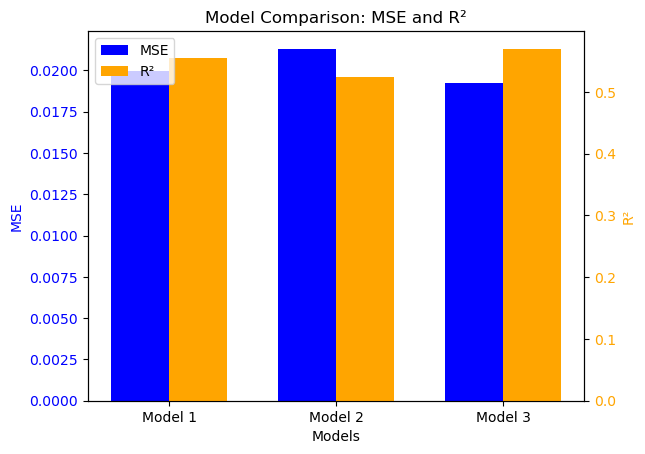

In [238]:
import matplotlib.pyplot as plt
import numpy as np

# Error metrics for each model (replace these with your actual MSE and R² values)
mse_values = [mse_lr, mse_svr, mse_enr]
r2_values = [r2_lr, r2_svr, r2_enr]
models = ['Model 1', 'Model 2', 'Model 3']

# Set up the bar chart
x = np.arange(len(models))  # the label locations
width = 0.35  # the width of the bars

fig, ax1 = plt.subplots()

# Create bars for MSE
mse_bars = ax1.bar(x - width/2, mse_values, width, label='MSE', color='blue')

# Create bars for R² in the same plot
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
r2_bars = ax2.bar(x + width/2, r2_values, width, label='R²', color='orange')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax1.set_xlabel('Models')
ax1.set_ylabel('MSE', color='blue')
ax2.set_ylabel('R²', color='orange')
ax1.set_title('Model Comparison: MSE and R²')
ax1.set_xticks(x)
ax1.set_xticklabels(models)
ax1.tick_params(axis='y', labelcolor='blue')
ax2.tick_params(axis='y', labelcolor='orange')

# Add a legend
fig.legend(loc="upper left", bbox_to_anchor=(0,1), bbox_transform=ax1.transAxes)

# Show the plot
plt.show()


Model 1 (Linear Regression) : 
- It has a slightly higher MSE than Model 3 indicating a marginally worse fit 
- It also has slightly lower R^2 value than Model 3, just above 0,5, suggesting that it explains just over 50% of the variance in the outcome

Model 2(SVR) :
- It has the highest MSE suggesting it has the least accurate fit of the three
- It has an R^2 value of just above 0,5 also explaining just over 50% of the variance

Model 3 (Elastic Net Regression) : 
- It has the lowest MSE, suggesting that it has the best fit among the three models
- It has the highest R^2 value, close to 0,6, indicating it explains nearly 60% of the variance in the data

In summary, the Model 3 (Elastic Net Regression) has the lowest MSE and the highest R^2. It is the best predictor because for instance, if the predictive accuracy is paramount, you might favor the model with the lowest MSE and if you want to understand the factors that influence your dependent variable, a higher R^2 might be more desirable. As we have both with Model 3, it is the best model between the three

Now, we will do a histogram of residuals from the three different regression models. Riduals are the differences between the observed values and the values predicted by the model.

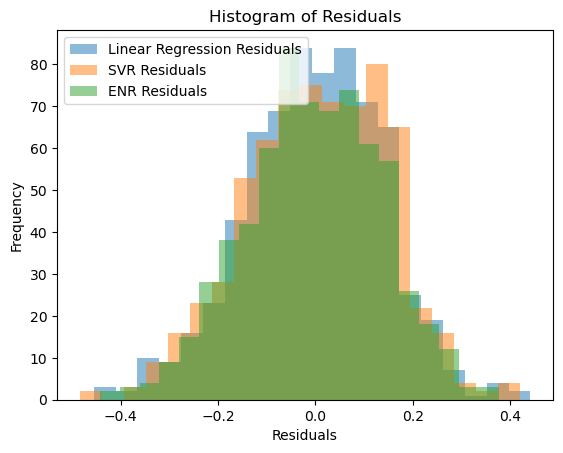

In [244]:
# Residuals histogram for Linear Regression
residuals_lr = y_test - y_pred_lr
plt.hist(residuals_lr, bins=20, alpha=0.5, label='Linear Regression Residuals')

# Residuals histogram for svr
residuals_lasso = y_test - y_pred_svr
plt.hist(residuals_lasso, bins=20, alpha=0.5, label='SVR Residuals')

# Residuals histogram for enr
residuals_lasso = y_test - y_pred_enr
plt.hist(residuals_lasso, bins=20, alpha=0.5, label='ENR Residuals')

plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.legend()
plt.show()


* A well-fitting model will have residuals centered around zero. This indicates that the model, on average, predicts the outcomes accurately. All three models in the histogram show residuals centered around zero, which is a good sign.

* The closer the distribution of the residuals is to a normal distribution, the better the model is at making predictions across the data. In this histogram, the residuals for all three models seem to roughly follow a normal distribution

* The width of the distribution reflects the variance of the residuals. A narrower distribution means that the predictions are more consistent. The histogram suggests that the SVR has a slightly wider spread of residuals than the other two models, indicating more variability in its predictions.

* The tails of the distribution indicate the presence of outliers or large prediction errors. Longer tails mean more outliers. In this histogram, it appears that the residuals for all models have relatively short tails, suggesting there are few large errors.

<div class='alert-block alert-info'>
    <br>
    <h2 style="font-style: normal;"><b>Conclusion</b></h2>
    <br>
</div>

Our dataset was easy to pre process because it was not the largest. There were quite enough datas to do some comparaison and visualization and to predict how to be in the best LeagueIndex.

We decided to drop the features that were the less related to the LeagueIndex, like GameID for instance, because it has no impact on how to be the best player.

The distribution of the dataset made us understand that there were some outliers like for the TotalHours. But we also decided to drop this feature because the data was strange and we understood that some people that train and play a lot, create some new account and falsify our dataset. 

Thanks to the visualizations we were able to extract the 5 features that have the most impact on the LeagueIndex : ActionLatency, APM, GapBetweenPACs, AssignToHotkeys, NumberOfPACs. 

Then we splitted the data so the models could train easily. We chose three different models of data regression : Linear Regression, SVR and Elastic Net Regression. 

Thanks to the graphics of which of these three models was the best, we determined that Elastic Net Regression algorithm was the best. It has the conclusion that the features that impact the LeagueIndex are the same five features with MinimapRightClick. 

To resume, to be in the best LeagueIndex and be the best player of SkillCraft you have to do a maximum of actions per min, have the lowest latency between what you see and your reaction, and do the action the most quickly you can. 